In [1]:
from utils import *

#Task 1

##Part 2
The chosen model is ConvNet

In [2]:
from ptflops import get_model_complexity_info
import matplotlib.pyplot as plt
from tqdm import tqdm


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


class Args:
    def __init__(self):
        self.device = 'cuda' if torch.cuda.is_available() else 'cpu'

def train(net, trainloader, criterion, optimizer,device=device):
    net.train()
    net.to(device)
    #create args.device 
    args = Args()
    args.device = device
    progress_bar = tqdm(range(20), total=20, desc=f'Training - No data available', leave=True)

    for i in progress_bar:
        loss_avg, acc_avg, num_exp = 0, 0, 0
        for i_batch, datum in enumerate(trainloader):
            img = datum[0].float().to(args.device)
            lab = datum[1].long().to(args.device)
            n_b = lab.shape[0]
            output = net(img)
            loss = criterion(output, lab)
            acc = np.sum(np.equal(np.argmax(output.cpu().data.numpy(), axis=-1), lab.cpu().data.numpy()))
            loss_avg += loss.item()*n_b
            acc_avg += acc
            num_exp += n_b

            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        loss_avg /= num_exp
        acc_avg /= num_exp
        progress_bar.set_description(f'Training - Loss: {loss_avg:.4f} - Accuracy: {acc_avg:.4f}')
    return net

def test(net, testloader, criterion, optimizer,device=device):
    net.eval()
    net.to(device)
    args = Args()
    args.device = device
    loss_avg, acc_avg, num_exp = 0, 0, 0
    for i_batch, datum in enumerate(testloader):
        img = datum[0].float().to(args.device)
        lab = datum[1].long().to(args.device)
        n_b = lab.shape[0]

        output = net(img)
        loss = criterion(output, lab)
        acc = np.sum(np.equal(np.argmax(output.cpu().data.numpy(), axis=-1), lab.cpu().data.numpy()))
        loss_avg += loss.item()*n_b
        acc_avg += acc
        num_exp += n_b


    loss_avg /= num_exp
    acc_avg /= num_exp
    print(f'Accuracy of the network on the test images: {acc_avg*100}%')

def count_flops(net, channel, im_size):
    param = (channel, im_size[0], im_size[1])
    flops, params = get_model_complexity_info(net, param, as_strings=True, print_per_layer_stat=False)
    print(f'FLOPs: {flops}')
    print(f'Params: {params}')

In [6]:
#MNIST Dataset
data_path = "./Project A/data"

#load the dataset
channel, im_size, num_classes, class_names, mean, std, dst_train, dst_test, testloader = get_dataset("MNIST", data_path)

#define the model
net = get_network('ConvNetD3', channel, num_classes, im_size)
net.to(device)

#define the loss function
criterion = nn.CrossEntropyLoss()
#define the optimizer
optimizer = torch.optim.SGD(net.parameters(), lr=0.01)
#define the learning rate scheduler
#train the model
#create trainloader
trainloader = torch.utils.data.DataLoader(dst_train, batch_size=64, shuffle=True)
net = train(net, trainloader, criterion, optimizer)

Training - No data available:   0%|          | 0/20 [00:00<?, ?it/s]

output shape:  torch.Size([64, 10])
lab shape:  torch.Size([64])
output shape:  torch.Size([64, 10])
lab shape:  torch.Size([64])
output shape:  torch.Size([64, 10])
lab shape:  torch.Size([64])
output shape:  torch.Size([64, 10])
lab shape:  torch.Size([64])
output shape:  torch.Size([64, 10])
lab shape:  torch.Size([64])
output shape:  torch.Size([64, 10])
lab shape:  torch.Size([64])
output shape:  torch.Size([64, 10])
lab shape:  torch.Size([64])
output shape:  torch.Size([64, 10])
lab shape:  torch.Size([64])
output shape:  torch.Size([64, 10])
lab shape:  torch.Size([64])
output shape:  torch.Size([64, 10])
lab shape:  torch.Size([64])
output shape:  torch.Size([64, 10])
lab shape:  torch.Size([64])
output shape:  torch.Size([64, 10])
lab shape:  torch.Size([64])
output shape:  torch.Size([64, 10])
lab shape:  torch.Size([64])
output shape:  torch.Size([64, 10])
lab shape:  torch.Size([64])
output shape:  torch.Size([64, 10])
lab shape:  torch.Size([64])
output shape:  torch.Size

Training - No data available:   0%|          | 0/20 [00:00<?, ?it/s]

output shape:  torch.Size([64, 10])
lab shape:  torch.Size([64])
output shape:  torch.Size([64, 10])
lab shape:  torch.Size([64])
output shape:  torch.Size([64, 10])
lab shape:  torch.Size([64])
output shape:  torch.Size([64, 10])
lab shape:  torch.Size([64])
output shape:  torch.Size([64, 10])
lab shape:  torch.Size([64])
output shape:  torch.Size([64, 10])
lab shape:  torch.Size([64])
output shape:  torch.Size([64, 10])
lab shape:  torch.Size([64])
output shape:  torch.Size([64, 10])
lab shape:  torch.Size([64])
output shape:  torch.Size([64, 10])
lab shape:  torch.Size([64])
output shape:  torch.Size([64, 10])
lab shape:  torch.Size([64])
output shape:  torch.Size([64, 10])
lab shape:  torch.Size([64])
output shape:  torch.Size([64, 10])
lab shape:  torch.Size([64])
output shape:  torch.Size([64, 10])
lab shape:  torch.Size([64])
output shape:  torch.Size([64, 10])
lab shape:  torch.Size([64])
output shape:  torch.Size([64, 10])
lab shape:  torch.Size([64])
output shape:  torch.Size

KeyboardInterrupt: 

In [4]:
#test the model, report accuracy and FLOPs
#testloader = torch.utils.data.DataLoader(dst_test, batch_size=64, shuffle=False)
test(net, testloader, criterion, optimizer, device)
#report the FLOPs
count_flops(net, channel, im_size) 

Accuracy of the network on the test images: 99.4%
FLOPs: 49.59 MMac
Params: 317.71 k


In [3]:
#MHIST Dataset
#load the dataset
data_path = "mhist_dataset"
#print files in the directory
channel, im_size, num_classes, class_names, mean, std, dst_train, dst_test, testloader = get_dataset("MHIST", data_path)

#define the model
net = get_network('ConvNetD7', channel, num_classes, im_size)
net.to(device) 

#define the loss function
criterion = nn.CrossEntropyLoss()
#define the optimizer
optimizer = torch.optim.SGD(net.parameters(), lr=0.01)
#define the learning rate scheduler
#train the model
#create trainloader
trainloader = torch.utils.data.DataLoader(dst_train, batch_size=64, shuffle=True)
net=train(net, trainloader, criterion, optimizer)
            
            

Training - No data available:   0%|          | 0/20 [00:00<?, ?it/s]

Training - No data available:   0%|          | 0/20 [00:02<?, ?it/s]


KeyboardInterrupt: 

In [6]:
#test the model, report accuracy and FLOPs
test(net, testloader, criterion, optimizer, "cpu")
#report the FLOPs
count_flops(net, channel, im_size) 

Accuracy of the network on the test images: 81.78096212896622%
FLOPs: 2.7 GMac
Params: 891.14 k


### Distillation function
Found here https://github.com/DataDistillation/DataDAM/blob/main/main_DataDAM.py

In [3]:
from DataDAM import DataDAM
import os
#MNIST Dataset
data_path = "./Project A/data"

#create a folder to save the synthetic dataset
if not os.path.exists(os.path.join(data_path, 'synthetic_dataset_MNIST')):
    os.makedirs(os.path.join(data_path, 'synthetic_dataset_MNIST'))

#load the dataset
channel, im_size, num_classes, class_names, mean, std, dst_train, dst_test, testloader = get_dataset("MNIST", data_path)

#define the model
net = 'ConvNetD3'

Distillator = DataDAM(net, dst_train, 10, num_classes=num_classes, im_size=im_size, channels=channel, 
                      save_path=os.path.join(data_path, 'synthetic_dataset_MNIST'),
                      batch_size=32, K=100, T=10, eta_S = 0.1, zeta_S = 1, eta_theta = 0.01, zeta_theta=50, lambda_mmd=0.01, device=device, minibatches_size=256)

mean_gaussian = 0
std_gaussian = 1
Distillator.initialize_synthetic_dataset_from_gaussian_noise(mean_gaussian,std_gaussian)


trainloader = torch.utils.data.DataLoader(dst_train, batch_size=64, shuffle=True)
condensed_dataset = Distillator.train()




/Data/GRZ/ECE1512_2024F_ProjectRepo_Grzeczkowicz/Project A/DataDAM.py:67: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:278.)
  self.label_syn = torch.tensor([np.ones(self.IPC)*i for i in range(self.num_classes)], dtype=torch.long, requires_grad=False, device=self.device).view(-1) # [0,0,0, 1,1,1, ..., 9,9,9]
Iterations:   0%|          | 0/10 [00:40<?, ?it/s]


OutOfMemoryError: CUDA out of memory. Tried to allocate 16.00 MiB. GPU 0 has a total capacity of 23.66 GiB of which 2.62 MiB is free. Including non-PyTorch memory, this process has 23.55 GiB memory in use. Of the allocated memory 23.21 GiB is allocated by PyTorch, and 24.42 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

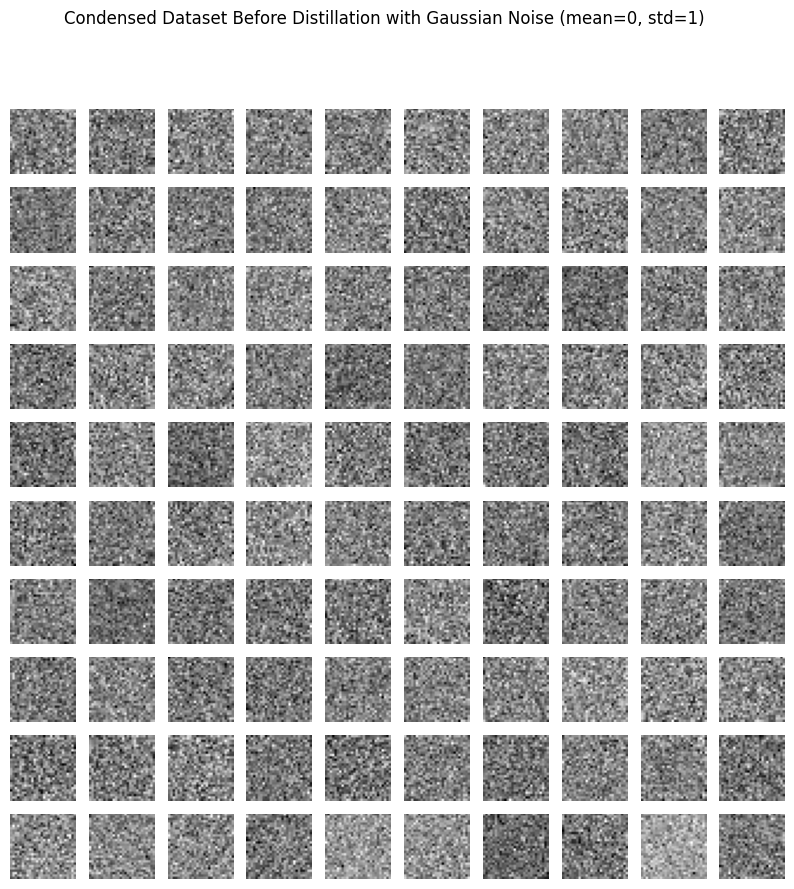

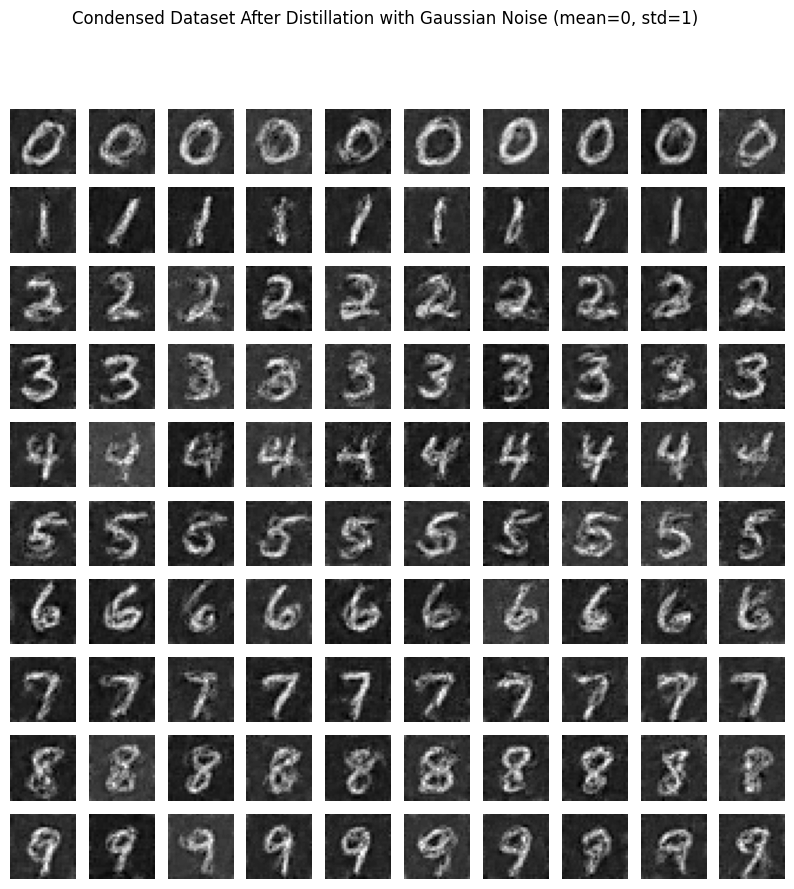

In [9]:
for j in [0,-1]:
    images = condensed_dataset[j][0]
    labels = condensed_dataset[j][1]

    fig, axes = plt.subplots(nrows=10, ncols=10, figsize=(10, 10))


    for i, ax in enumerate(axes.flat):
        img = images[i].numpy().squeeze()
        ax.imshow(img, cmap='gray')
        ax.axis('off')
    print("\n")
    if j == 0:
        fig.suptitle(f"Condensed Dataset Before Distillation with Gaussian Noise (mean={mean_gaussian}, std={std_gaussian})")
    else:
        fig.suptitle(f"Condensed Dataset After Distillation with Gaussian Noise (mean={mean_gaussian}, std={std_gaussian})")
    plt.show()

#Save the distilled dataset
torch.save(condensed_dataset[-1], os.path.join(data_path, 'synthetic_dataset_MNIST', 'MNIST_Distilled_Gaussian_Noise.pt'))



In [10]:
#define the model
net = 'ConvNetD3'

Distillator = DataDAM(net, dst_train, 10, num_classes=num_classes, im_size=im_size, channels=channel, 
                      save_path=os.path.join(data_path, 'synthetic_dataset_MNIST'),
                      batch_size=256, K=100, T=10, eta_S = 0.1, zeta_S = 1, eta_theta = 0.01, zeta_theta=50, lambda_mmd=0.01, device=device)

Distillator.initialize_synthetic_dataset_from_real()


trainloader = torch.utils.data.DataLoader(dst_train, batch_size=64, shuffle=True)
condensed_dataset = Distillator.run()

K: 100%|██████████| 100/100 [02:50<00:00,  1.71s/it]


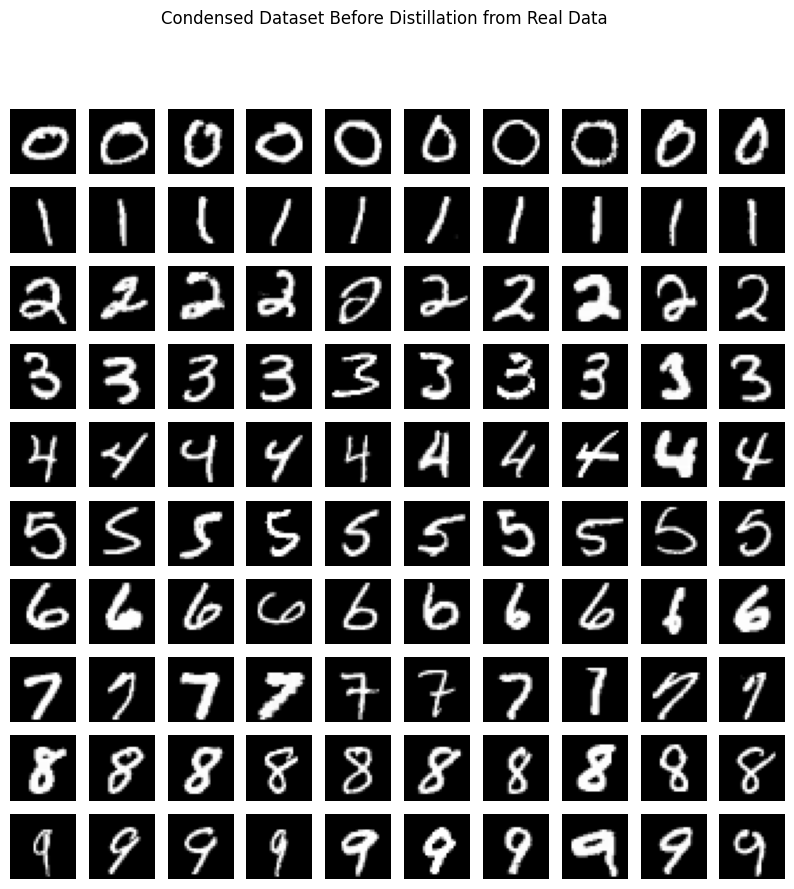

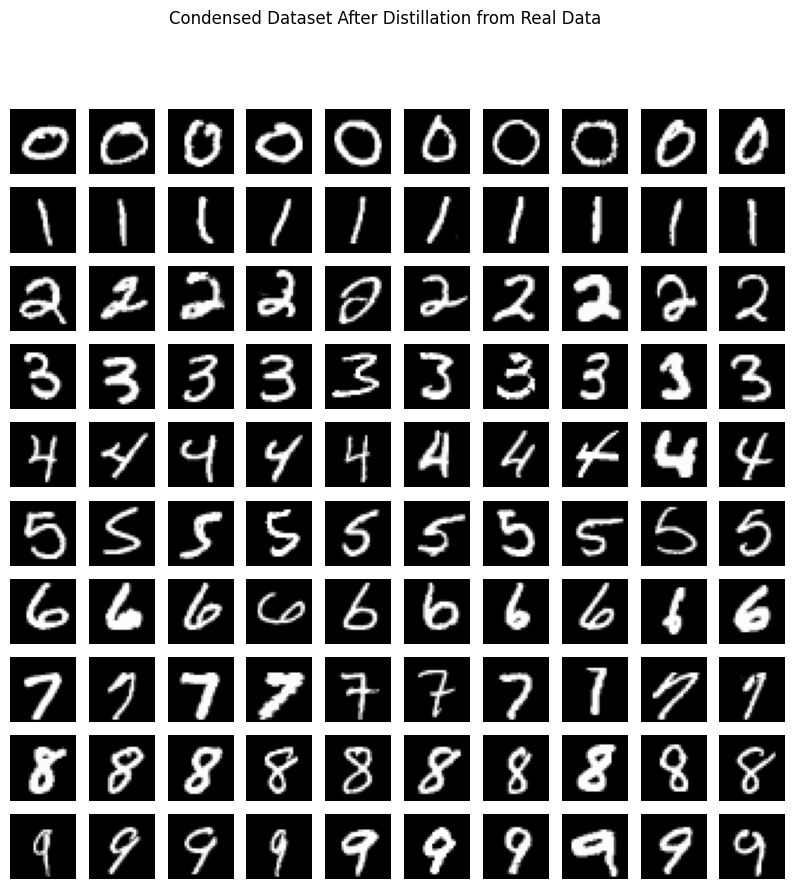

In [11]:
for j in [0,-1]:
    images = condensed_dataset[j][0]
    labels = condensed_dataset[j][1]

    fig, axes = plt.subplots(nrows=10, ncols=10, figsize=(10, 10))
    # fig.suptitle(iteration)

    for i, ax in enumerate(axes.flat):
        img = images[i].numpy().squeeze()
        ax.imshow(img, cmap='gray')
        ax.axis('off')
    print("\n")
    if j == 0:
        fig.suptitle(f"Condensed Dataset Before Distillation from Real Data")
    else:
        fig.suptitle(f"Condensed Dataset After Distillation from Real Data")
    plt.show()

#Save the distilled dataset
torch.save(condensed_dataset[-1], os.path.join(data_path, 'synthetic_dataset_MNIST', 'MNIST_Distilled_Real_Data.pt'))



In [13]:
from DataDAM import DataDAM
import os

#MNIST Dataset
data_save_path = "./Project A/data"
data_path = "mhist_dataset"


#create a folder to save the synthetic dataset
if not os.path.exists(os.path.join(data_save_path, 'synthetic_dataset_MHIST')):
    os.makedirs(os.path.join(data_save_path, 'synthetic_dataset_MHIST'))


#load the dataset
channel, im_size, num_classes, class_names, mean, std, dst_train, dst_test, testloader = get_dataset("MHIST", data_path)

#define the model
net = 'ConvNetD7'

Distillator = DataDAM(net, dst_train, 50, num_classes=num_classes, im_size=im_size, channels=channel, 
                      save_path=os.path.join(data_path, 'synthetic_dataset_MHIST'),
                      batch_size=128, K=200, T=10, eta_S = 0.1, zeta_S = 1, eta_theta = 0.01, zeta_theta=50, lambda_mmd=0.01, device="cpu")

mean_gaussian = 0
std_gaussian = 1
Distillator.initialize_synthetic_dataset_from_gaussian_noise(mean_gaussian,std_gaussian)


trainloader = torch.utils.data.DataLoader(dst_train, batch_size=64, shuffle=True)
condensed_dataset = Distillator.run()




K:   0%|          | 0/200 [00:39<?, ?it/s]


KeyboardInterrupt: 

In [ ]:
for j in [0,-1]:
    images = condensed_dataset[j][0]
    labels = condensed_dataset[j][1]

    fig, axes = plt.subplots(nrows=10, ncols=10, figsize=(10, 10))


    for i, ax in enumerate(axes.flat):
        img = images[i].numpy().squeeze()
        ax.imshow(img, cmap='gray')
        ax.axis('off')
    print("\n")
    if j == 0:
        fig.suptitle(f"Condensed Dataset Before Distillation with Gaussian Noise (mean={mean_gaussian}, std={std_gaussian})")
    else:
        fig.suptitle(f"Condensed Dataset After Distillation with Gaussian Noise (mean={mean_gaussian}, std={std_gaussian})")
    plt.show()

#Save the distilled dataset
torch.save(condensed_dataset[-1], os.path.join(data_save_path, 'synthetic_dataset_MHIST', 'MHIST_Distilled_Gaussian_Noise.pt'))



In [ ]:
from DataDAM import DataDAM
import os

#MNIST Dataset
data_save_path = "./Project A/data"
data_path = "mhist_dataset"


#create a folder to save the synthetic dataset
if not os.path.exists(os.path.join(data_save_path, 'synthetic_dataset_MHIST')):
    os.makedirs(os.path.join(data_save_path, 'synthetic_dataset_MHIST'))


#load the dataset
channel, im_size, num_classes, class_names, mean, std, dst_train, dst_test, testloader = get_dataset("MHIST", data_path)

#define the model
net = 'ConvNetD7'

Distillator = DataDAM(net, dst_train, 50, num_classes=num_classes, im_size=im_size, channels=channel, 
                      save_path=os.path.join(data_path, 'synthetic_dataset_MHIST'),
                      batch_size=128, K=200, T=10, eta_S = 0.1, zeta_S = 1, eta_theta = 0.01, zeta_theta=50, lambda_mmd=0.01, device=device)

Distillator.initialize_synthetic_dataset_from_real()


trainloader = torch.utils.data.DataLoader(dst_train, batch_size=64, shuffle=True)
condensed_dataset = Distillator.run()




In [ ]:
for j in [0,-1]:
    images = condensed_dataset[j][0]
    labels = condensed_dataset[j][1]

    fig, axes = plt.subplots(nrows=10, ncols=10, figsize=(10, 10))


    for i, ax in enumerate(axes.flat):
        img = images[i].numpy().squeeze()
        ax.imshow(img, cmap='gray')
        ax.axis('off')
    print("\n")
    if j == 0:
        fig.suptitle(f"Condensed Dataset Before Distillation from Real Data")
    else:
        fig.suptitle(f"Condensed Dataset After Distillation from Real Data")
    plt.show()

#Save the distilled dataset
torch.save(condensed_dataset[-1], os.path.join(data_save_path, 'synthetic_dataset_MHIST', 'MHIST_Distilled_Real_Data.pt'))

